# Motivations
-----

I am a big fan of movies. I always wanted to do a movie project. When I came across this dataset on Kaggle, I realized that the use of OTT platforms was quite a hot topic during this lockdown period. In this project, my goal is to spot the differences between each OTT platform: Netflix, Hulu, Prime Video and Disney+. But I believe it is also interesting to consider this dataset as a whole and find global movie insights.

Let's have a look at it!

------

# Sources

I would like to thank Ruchi Bhatia for the great dataset she provided on Kaggle.

https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney

I would also like to thank ZhongTr0n for his tutorial on how to create a map from categorical data with Python.

https://towardsdatascience.com/create-categorical-choropleth-with-python-122da5ae6764

# Imports

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

# Data collection

***Data import***

In [4]:
data = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv').drop('Unnamed: 0',axis=1)

In [5]:
data.head()

ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             87%   
1   2                      The Matrix  1999  18+   8.7             87%   
2   3          Avengers: Infinity War  2018  13+   8.5             84%   
3   4              Back to the Future  1985   7+   8.5             96%   
4   5  The Good, the Bad and the Ugly  1966  18+   8.8             97%   

   Netflix  Hulu  Prime Video  Disney+  Type                       Directors  \
0        1     0            0        0     0               Christopher Nolan   
1        1     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2        1     0            0        0     0         Anthony Russo,Joe Russo   
3        1     0            0        0     0                 Robert Zemeckis   
4        1     0            1        0     0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime  
0  English,Japanese,French    148.0  
1                  English    136.0  
2                  English    149.0  
3                  English    116.0  
4                  Italian    161.0

***Columns description***

In [7]:
data.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres',
       'Country', 'Language', 'Runtime'],
      dtype='object')

In [8]:
data.shape

(16744, 16)

| Variable        | Definition                                | Key           |
|-----------------|-------------------------------------------|---------------|
| ID              | Unique movie ID                           |               |
| Title           | Title of the movie                        |               |
| Year            | Year when the movie was produced          |               |
| Age             | Target age group                          |               |
| IMDb            | IMDb rating                               |               |
| Rotten Tomatoes | Rotten Tomatoes %                         |               |
| Netflix         | Whether the movie is found on Netflix     | 1: Yes, 0: No |
| Hulu            | Whether the movie is found on Hulu        | 1: Yes, 0: No |
| Prime Video     | Whether the movie is found on Prime Video | 1: Yes, 0: No |
| Disney+         | Whether the movie is found on Disney+     | 1: Yes, 0: No |
| Type            | Movie or TV series                        |               |
| Directors       | Directors of the movie                    |               |
| Genres          | Genres of the movie                       |               |
| Country         | Country where the movie was produced      |               |
| Language        | Languages available for the movie         |               |
| Runtime         | Length of the movie                       |               |

# Data cleaning

***Describe the data***

In [12]:
data.describe()

ID          Year          IMDb       Netflix          Hulu  \
count  16744.000000  16744.000000  16173.000000  16744.000000  16744.000000   
mean    8372.500000   2003.014035      5.902751      0.212613      0.053930   
std     4833.720789     20.674321      1.347867      0.409169      0.225886   
min        1.000000   1902.000000      0.000000      0.000000      0.000000   
25%     4186.750000   2000.000000      5.100000      0.000000      0.000000   
50%     8372.500000   2012.000000      6.100000      0.000000      0.000000   
75%    12558.250000   2016.000000      6.900000      0.000000      0.000000   
max    16744.000000   2020.000000      9.300000      1.000000      1.000000   

        Prime Video       Disney+     Type       Runtime  
count  16744.000000  16744.000000  16744.0  16152.000000  
mean       0.737817      0.033684      0.0     93.413447  
std        0.439835      0.180419      0.0     28.219222  
min        0.000000      0.000000      0.0      1.000000  
25%        0.000000      0.000000      0.0     82.000000  
50%        1.000000      0.000000      0.0     92.000000  
75%        1.000000      0.000000      0.0    104.000000  
max        1.000000      1.000000      0.0   1256.000000

***Check for null values***

<Axes: >

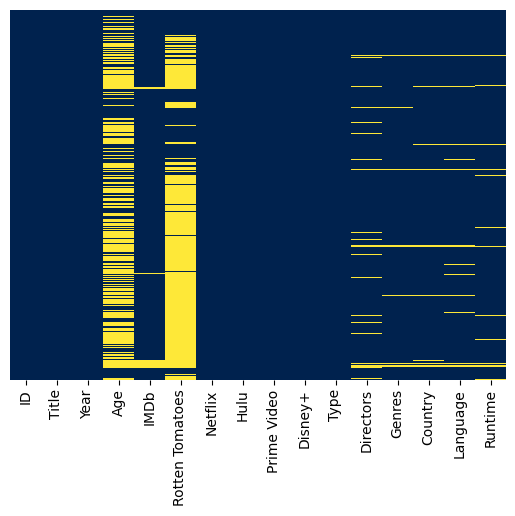

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

This dataset is quite large with more than 16k entries. The objective here is to perform EDA and find interesting insights. I might also try later to predict the rating of a movie. If we decide to drop some rows with missing values, it won't have too much impact on the outcomes. Let's have a look at the 'Age' and 'Rotten Tomatoes' features as they seem to have a lot of missing values.

In [16]:
print("{0:.0%}".format(data['Age'].isnull().value_counts()[1]/data.shape[0]),"of missing values in the 'Age' feature.")

44% of missing values in the 'Age' feature.


C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\707214023.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("{0:.0%}".format(data['Age'].isnull().value_counts()[1]/data.shape[0]),"of missing values in the 'Age' feature.")


In [17]:
print("{0:.0%}".format(data['Rotten Tomatoes'].isnull().value_counts()[1]/data.shape[0]),"of missing values in the 'Rotten Tomatoes' feature.")

31% of missing values in the 'Rotten Tomatoes' feature.


C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\844425693.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("{0:.0%}".format(data['Rotten Tomatoes'].isnull().value_counts()[1]/data.shape[0]),"of missing values in the 'Rotten Tomatoes' feature.")


In [18]:
print("{0:.0%}".format(data['IMDb'].isnull().value_counts()[1]/data.shape[0]),"of missing values in the 'IMDb' feature.")

3% of missing values in the 'IMDb' feature.


C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\2456728161.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("{0:.0%}".format(data['IMDb'].isnull().value_counts()[1]/data.shape[0]),"of missing values in the 'IMDb' feature.")


I will remove the 'Age' feature but I might come back to it later as there is still some insightful data available. I will drop the 'Rotten Tomatoes' feature as the 'IMDb' one can do the job for the prediction (only 3% of missing values). I will also drop the few rows on which we are missing some information like 'Directors', 'Genres' etc.

In [85]:
data_clean = data.drop(['Rotten Tomatoes','Age'],axis=1)

In [87]:
data_clean.dropna(inplace=True)

In [89]:
data_clean.reset_index(inplace=True,drop=True)

In [91]:
data_clean.head()

ID                           Title  Year  IMDb  Netflix  Hulu  Prime Video  \
0   1                       Inception  2010   8.8        1     0            0   
1   2                      The Matrix  1999   8.7        1     0            0   
2   3          Avengers: Infinity War  2018   8.5        1     0            0   
3   4              Back to the Future  1985   8.5        1     0            0   
4   5  The Good, the Bad and the Ugly  1966   8.8        1     0            1   

   Disney+  Type                       Directors  \
0        0     0               Christopher Nolan   
1        0     0  Lana Wachowski,Lilly Wachowski   
2        0     0         Anthony Russo,Joe Russo   
3        0     0                 Robert Zemeckis   
4        0     0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime  
0  English,Japanese,French    148.0  
1                  English    136.0  
2                  English    149.0  
3                  English    116.0  
4                  Italian    161.0

<Axes: >

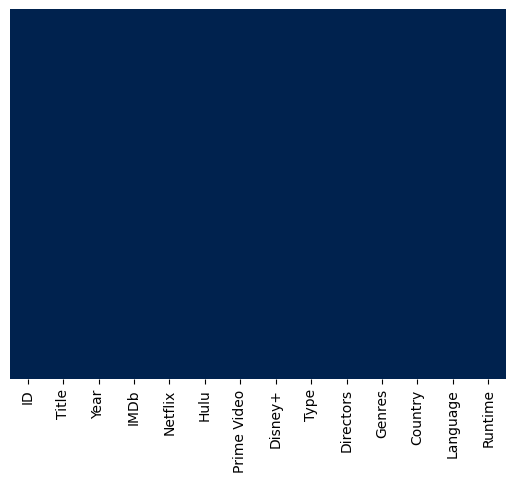

In [93]:
sns.heatmap(data_clean.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [95]:
print("We lost","{0:.0%}".format((data_clean.shape[0]-data.shape[0])/data.shape[0]),"of the initial dataset by removing null values.")

We lost -9% of the initial dataset by removing null values.


I believe this is ok, we can move forward with our cleaning.

***Deal with the 'Type' column***

In [99]:
data_clean.head()

ID                           Title  Year  IMDb  Netflix  Hulu  Prime Video  \
0   1                       Inception  2010   8.8        1     0            0   
1   2                      The Matrix  1999   8.7        1     0            0   
2   3          Avengers: Infinity War  2018   8.5        1     0            0   
3   4              Back to the Future  1985   8.5        1     0            0   
4   5  The Good, the Bad and the Ugly  1966   8.8        1     0            1   

   Disney+  Type                       Directors  \
0        0     0               Christopher Nolan   
1        0     0  Lana Wachowski,Lilly Wachowski   
2        0     0         Anthony Russo,Joe Russo   
3        0     0                 Robert Zemeckis   
4        0     0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime  
0  English,Japanese,French    148.0  
1                  English    136.0  
2                  English    149.0  
3                  English    116.0  
4                  Italian    161.0

In [101]:
data_clean['Type'].value_counts()

Type
0    15219
Name: count, dtype: int64

I noticed that the 'Type' feature should contain 1s and 0s to detect movies and TV series. Here this is not the case. I guess there is an issue with the dataset here. We will then remove this column.

In [104]:
data_clean.drop('Type',axis=1,inplace=True)

***Create additional columns***

In [107]:
data_clean.head()

ID                           Title  Year  IMDb  Netflix  Hulu  Prime Video  \
0   1                       Inception  2010   8.8        1     0            0   
1   2                      The Matrix  1999   8.7        1     0            0   
2   3          Avengers: Infinity War  2018   8.5        1     0            0   
3   4              Back to the Future  1985   8.5        1     0            0   
4   5  The Good, the Bad and the Ugly  1966   8.8        1     0            1   

   Disney+                       Directors                            Genres  \
0        0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1        0  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2        0         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3        0                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4        0                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

Let's take care of 'Directors', 'Genres', 'Country', and 'Language' which include several input. We will need to break down these features by creating additional columns.

As there will be a lot of additional columns, I will create new tables for 'Directors', 'Genres', 'Country' and 'Language'. I will then be able to merge them later depending on the analysis.

In [122]:
# Split the 'Directors' column into multiple columns
data_directors = data_clean['Directors'].apply(lambda x: x.split(','))

# Get dummy variables for each director, handling each separately
data_directors = pd.get_dummies(data_directors.apply(pd.Series), prefix='', prefix_sep='')

# Summing up along the rows (axis=1), remove 'level' argument
data_directors = data_directors.sum(axis=1)



In [124]:
# Split the 'Genres' column into multiple columns
data_genres = data_clean['Genres'].apply(lambda x: x.split(','))

# Get dummy variables for each genre, handling each genre separately
data_genres = pd.get_dummies(data_genres.apply(pd.Series), prefix='', prefix_sep='')

# Sum along the rows (axis=1) without the 'level' argument
data_genres = data_genres.sum(axis=1)


In [129]:
data_country = data_clean['Country'].apply(lambda x: x.split(','))
# Remove the 'level' argument from the sum() function
data_country = pd.get_dummies(data_country.apply(pd.Series), prefix='', prefix_sep='').sum(axis=1)

# Now data_country will contain the summed values without the error

Now that our tables are created, we can remove the columns in 'data_clean'.

In [131]:
data_clean = data_clean.drop(['Directors','Genres','Country','Language'],axis=1)

The data cleaning is now performed, let's jump to the EDA!

# Exploratory Data Analysis (EDA)

In [133]:
data_clean.head()

ID                           Title  Year  IMDb  Netflix  Hulu  Prime Video  \
0   1                       Inception  2010   8.8        1     0            0   
1   2                      The Matrix  1999   8.7        1     0            0   
2   3          Avengers: Infinity War  2018   8.5        1     0            0   
3   4              Back to the Future  1985   8.5        1     0            0   
4   5  The Good, the Bad and the Ugly  1966   8.8        1     0            1   

   Disney+  Runtime  
0        0    148.0  
1        0    136.0  
2        0    149.0  
3        0    116.0  
4        0    161.0

Here are the questions I would like to answer in the analysis:
- What is the OTT platform with the most movies?
- What is the rating distribution on OTT platforms? (in general + split)
- How old are movies on OTT platforms? (in general + split)
- How long are movies on OTT platforms? (in general + split)

We will first answer these questions before merging the metadata and extending our analysis.

### ***What is the OTT platform with the most movies?***
----------

In [135]:
data_clean.head()

ID                           Title  Year  IMDb  Netflix  Hulu  Prime Video  \
0   1                       Inception  2010   8.8        1     0            0   
1   2                      The Matrix  1999   8.7        1     0            0   
2   3          Avengers: Infinity War  2018   8.5        1     0            0   
3   4              Back to the Future  1985   8.5        1     0            0   
4   5  The Good, the Bad and the Ugly  1966   8.8        1     0            1   

   Disney+  Runtime  
0        0    148.0  
1        0    136.0  
2        0    149.0  
3        0    116.0  
4        0    161.0

In [137]:
OTT_movie_count = data_clean[['Netflix','Hulu','Prime Video','Disney+']].groupby(['Netflix','Hulu','Prime Video','Disney+'],as_index=False).sum().sum()

In [139]:
OTT_movie_count = pd.DataFrame(OTT_movie_count).reset_index()
OTT_movie_count.columns = ['Platform','Count']

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\356932875.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Platform',y='Count',data=OTT_movie_count,kind='bar',palette='cividis')


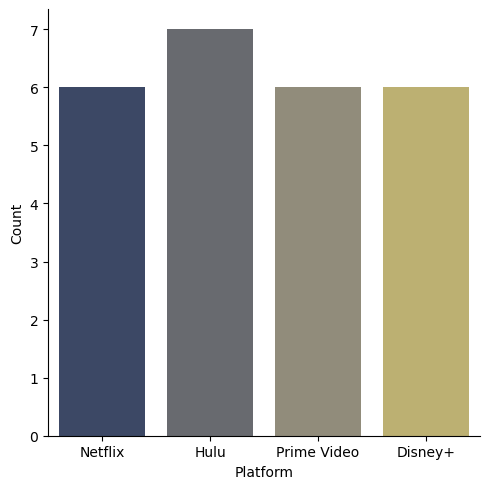

In [141]:
sns.catplot(x='Platform',y='Count',data=OTT_movie_count,kind='bar',palette='cividis')

Prime Video is the platform with the most content by far in this dataset.

### ***What is the rating distribution on OTT platforms?***
----------

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\3384879785.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean.IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


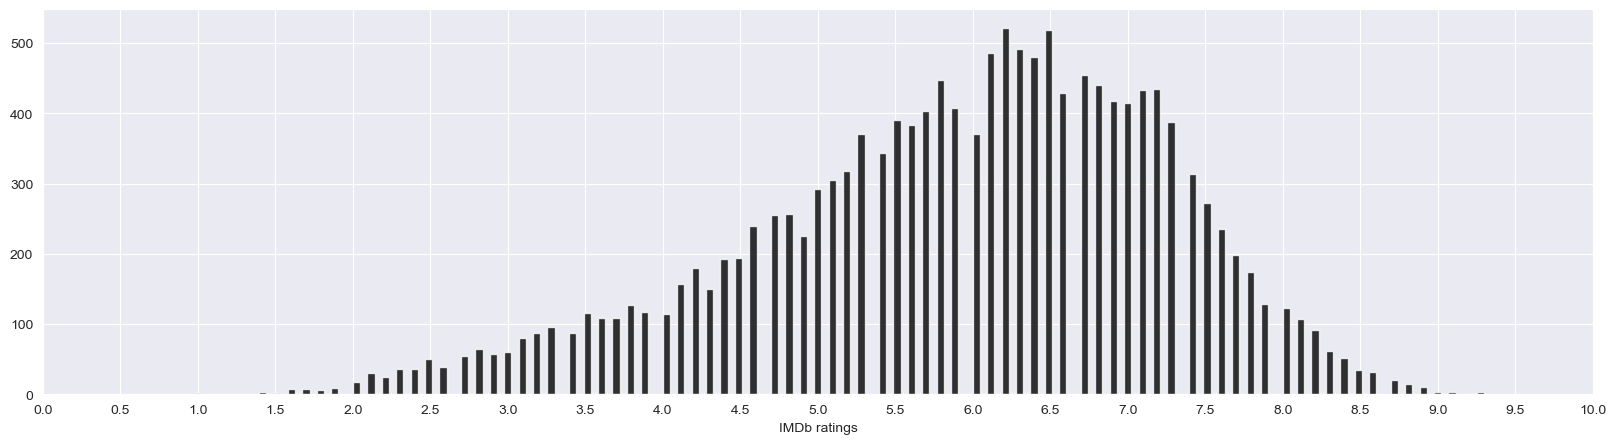

In [143]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean.IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='IMDb ratings',xlim=(0,10))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

In [145]:
data_clean.IMDb.mean()

5.898790984953019

In [147]:
data_clean.IMDb.median()

6.1

We notice that this graph has a **bell-shaped curve**. Most ratings are between **6 and 6.5**. Let's have a look if this curve changes depending on the platform.

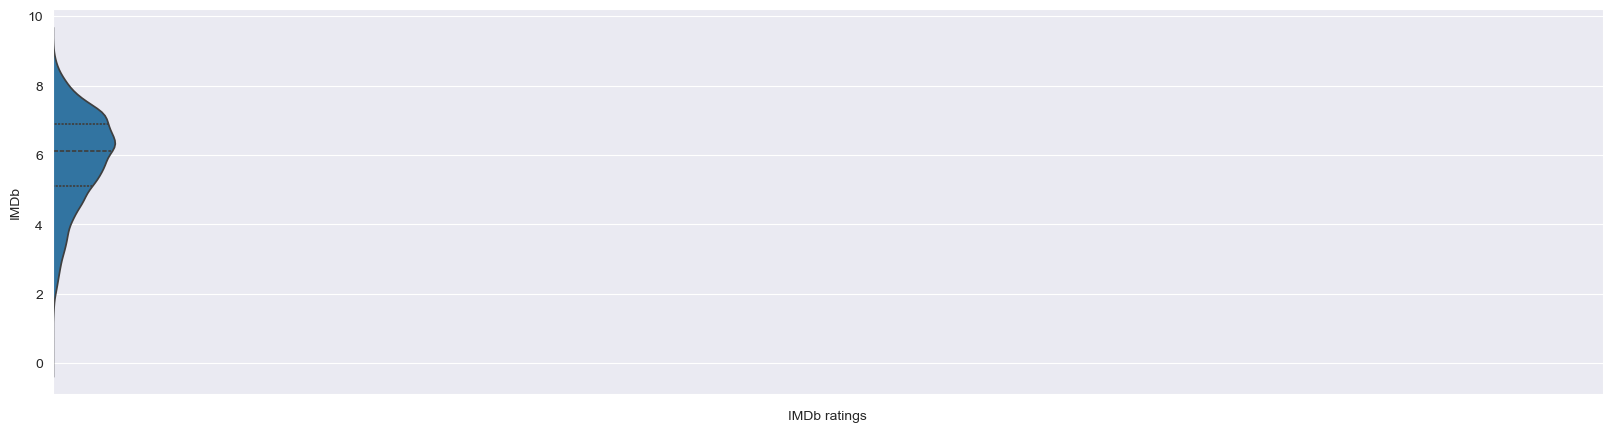

In [150]:
plt.figure(figsize=(20,5))
rating_violin = sns.violinplot(data_clean.IMDb,inner='quartile')
rating_violin.set(xlabel='IMDb ratings',xlim=(0,10))
rating_violin.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

**Netflix**

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\410405207.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean[data_clean['Netflix']==1].IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


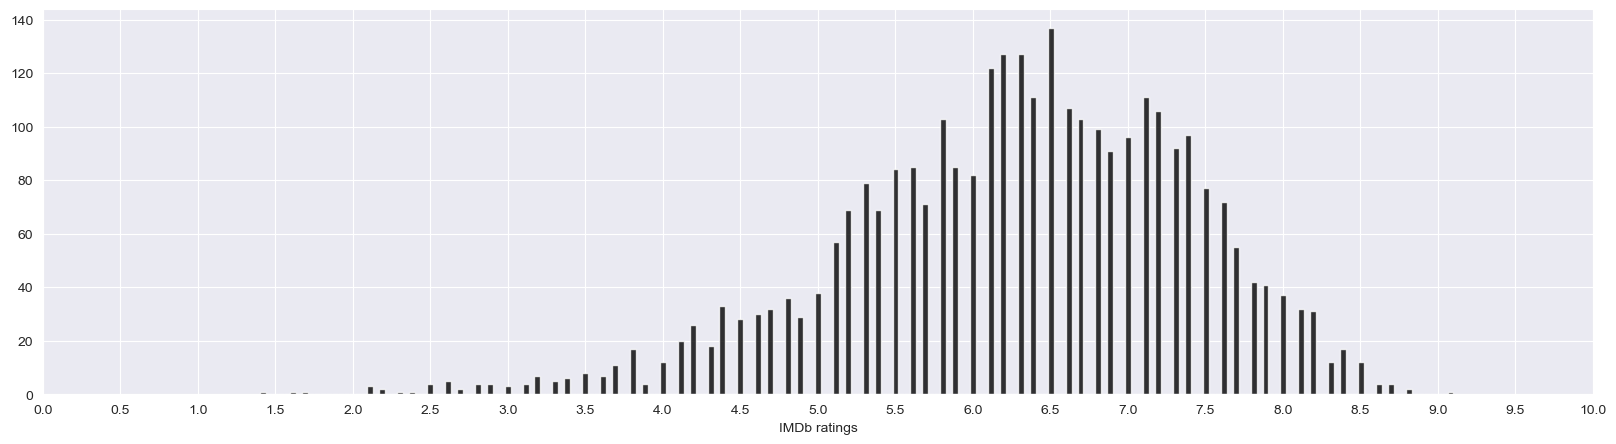

In [153]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Netflix']==1].IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='IMDb ratings',xlim=(0,10))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

In [155]:
data_clean[data_clean['Netflix']==1].IMDb.mean()

6.27338197969543

In [157]:
data_clean[data_clean['Netflix']==1].IMDb.median()

6.4

**Hulu**

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\3070827419.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean[data_clean['Hulu']==1].IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


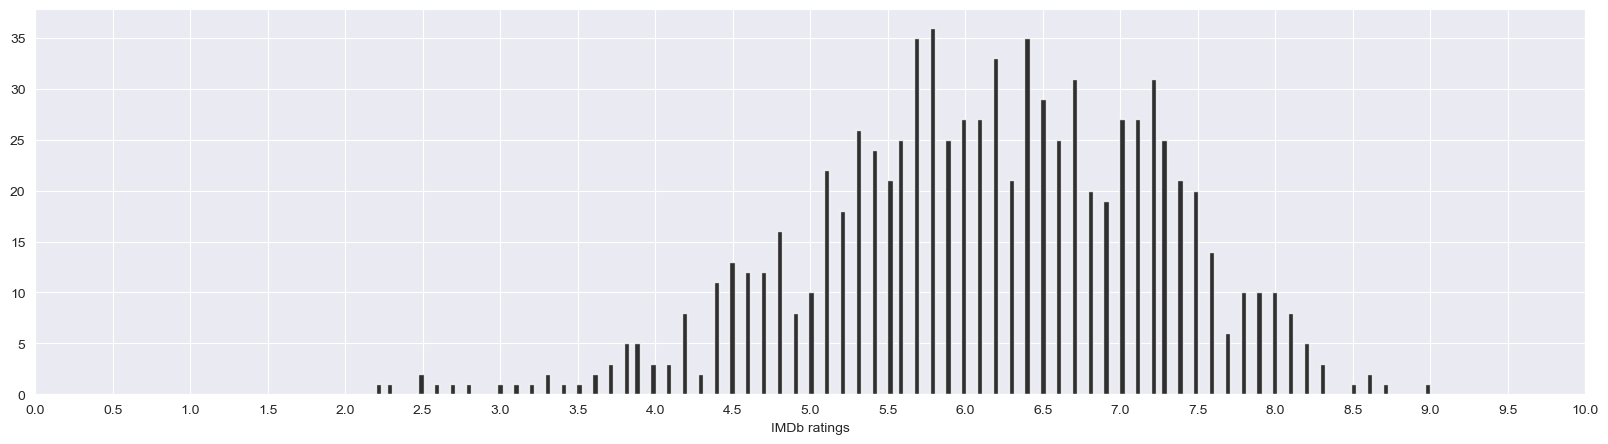

In [160]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Hulu']==1].IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='IMDb ratings',xlim=(0,10))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

In [161]:
data_clean[data_clean['Hulu']==1].IMDb.mean()

6.136910377358491

In [164]:
data_clean[data_clean['Hulu']==1].IMDb.median()

6.2

**Prime Video**

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\1987252218.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean[data_clean['Prime Video']==1].IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


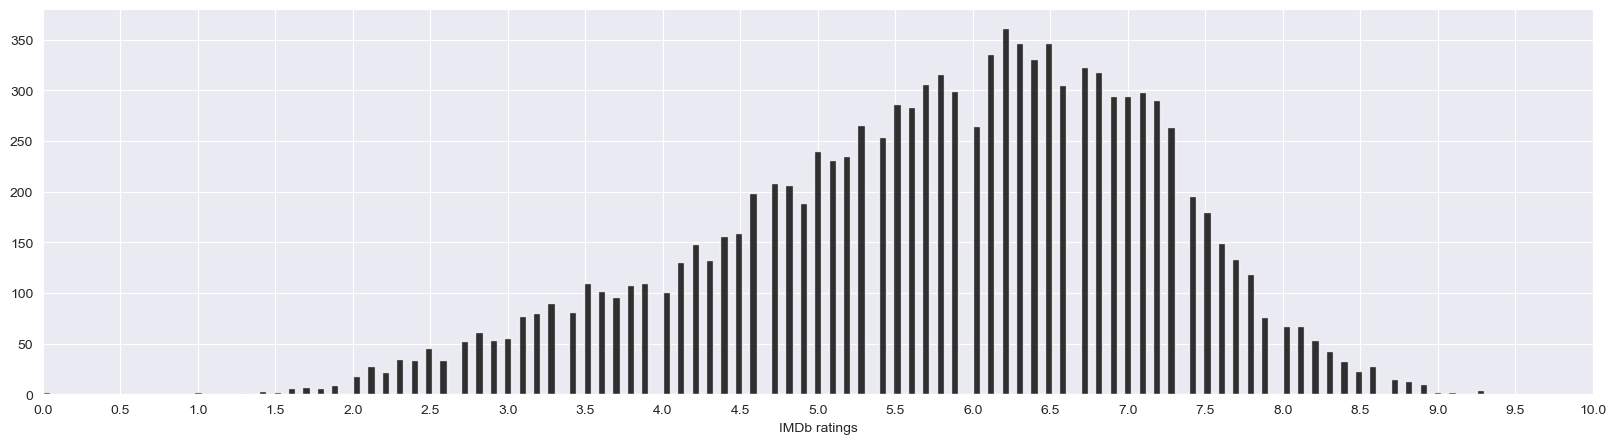

In [167]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Prime Video']==1].IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='IMDb ratings',xlim=(0,10))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

In [169]:
data_clean[data_clean['Prime Video']==1].IMDb.mean()

5.76301880099326

In [171]:
data_clean[data_clean['Prime Video']==1].IMDb.median()

5.9

**Disney+**

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\2055673503.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean[data_clean['Disney+']==1].IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


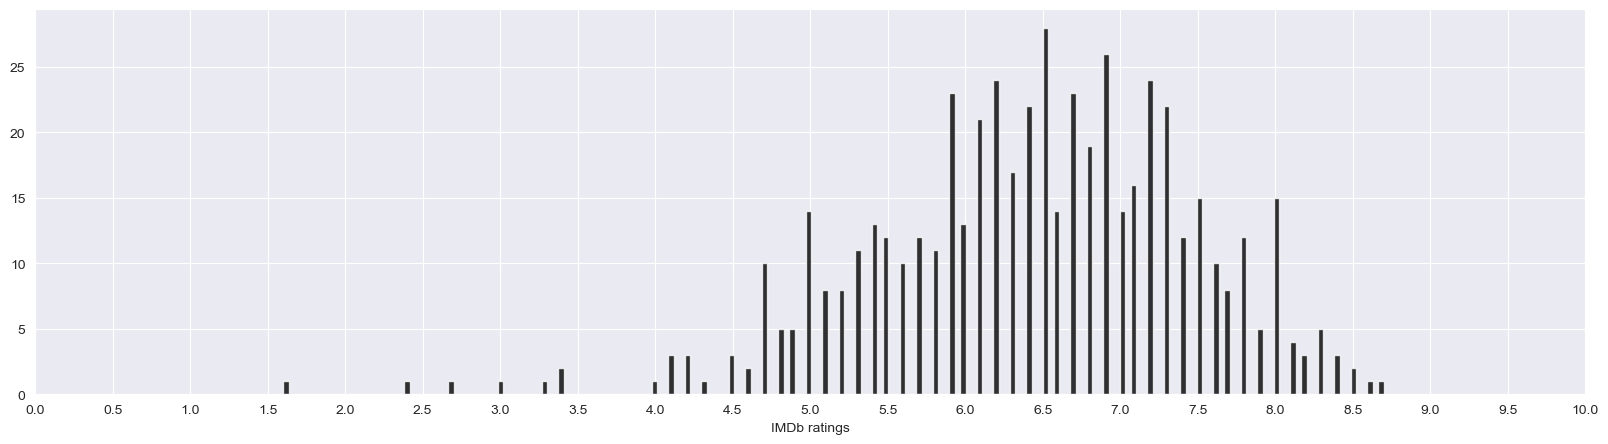

In [174]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Disney+']==1].IMDb,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='IMDb ratings',xlim=(0,10))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

In [176]:
data_clean[data_clean['Disney+']==1].IMDb.mean()

6.426802218114602

In [178]:
data_clean[data_clean['Disney+']==1].IMDb.median()

6.5

Based on these graphs and data, it looks like on average that **Disney+ has more well-rated movies**.

### ***How old are movies on OTT platforms?***
----------

In [182]:
data_clean.head()

ID                           Title  Year  IMDb  Netflix  Hulu  Prime Video  \
0   1                       Inception  2010   8.8        1     0            0   
1   2                      The Matrix  1999   8.7        1     0            0   
2   3          Avengers: Infinity War  2018   8.5        1     0            0   
3   4              Back to the Future  1985   8.5        1     0            0   
4   5  The Good, the Bad and the Ugly  1966   8.8        1     0            1   

   Disney+  Runtime  
0        0    148.0  
1        0    136.0  
2        0    149.0  
3        0    116.0  
4        0    161.0

In [184]:
data_clean['Year'].describe()

count    15219.000000
mean      2002.358696
std         21.002980
min       1902.000000
25%       1999.000000
50%       2011.000000
75%       2016.000000
max       2020.000000
Name: Year, dtype: float64

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\323212666.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean.Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


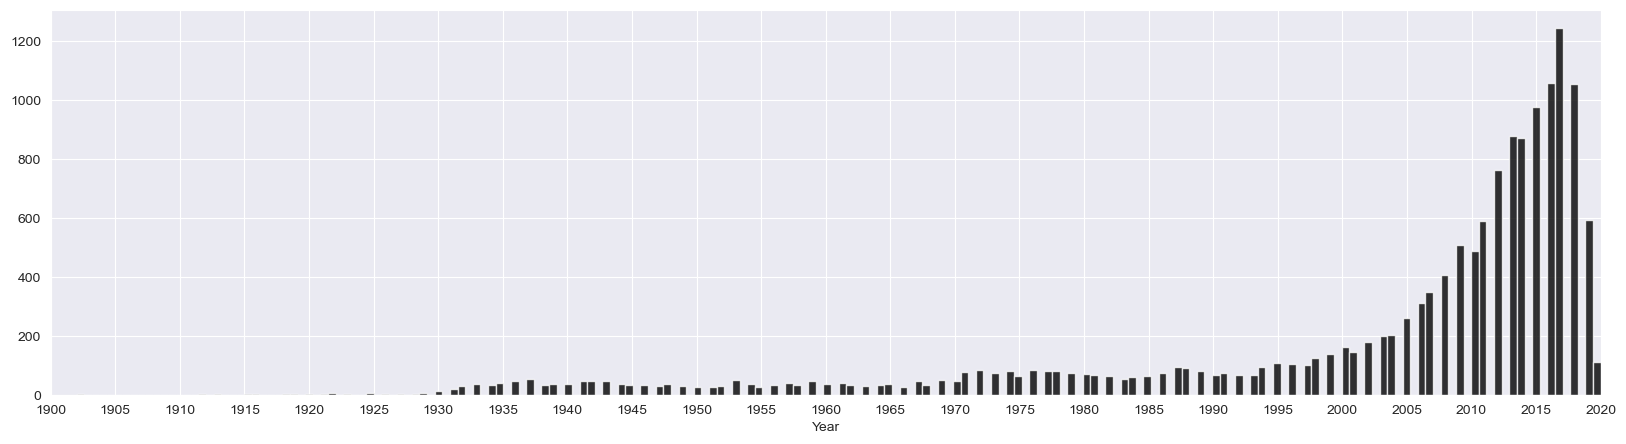

In [186]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean.Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Year',xlim=(1900,2020))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(5))

It is clear here that most movies on OTT platforms were produced **between 2010 and 2020**. Let's have a look if there is a difference between platforms.

**Netflix**

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\3993329942.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean[data_clean['Netflix']==1].Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


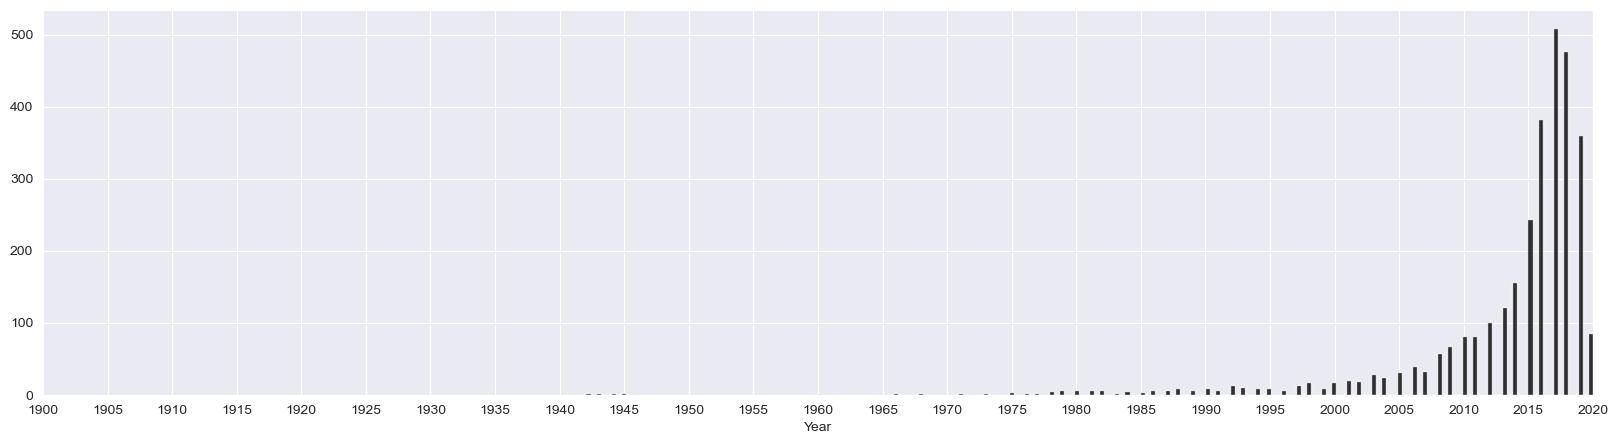

In [190]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Netflix']==1].Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Year',xlim=(1900,2020))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [192]:
data_clean[data_clean['Netflix']==1].Year.mean()

2013.083121827411

In [194]:
data_clean[data_clean['Netflix']==1].Year.median()

2016.0

**Hulu**

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\4264866901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean[data_clean['Hulu']==1].Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


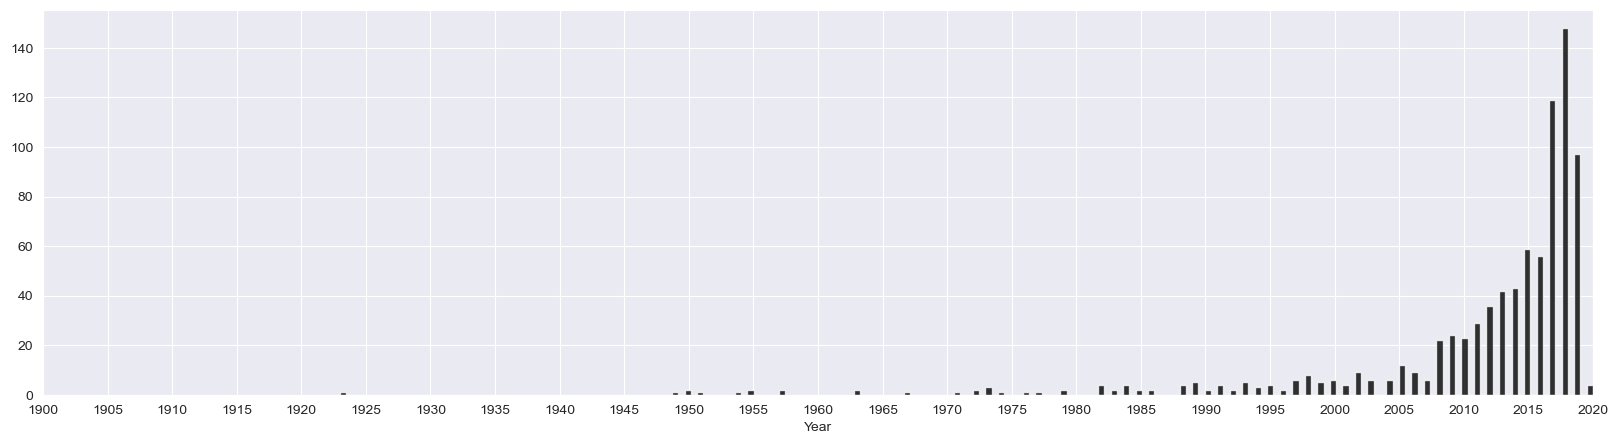

In [197]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Hulu']==1].Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Year',xlim=(1900,2020))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [199]:
data_clean[data_clean['Hulu']==1].Year.mean()

2011.4646226415093

In [201]:
data_clean[data_clean['Hulu']==1].Year.median()

2015.5

**Prime Video**

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\2880128640.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean[data_clean['Prime Video']==1].Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


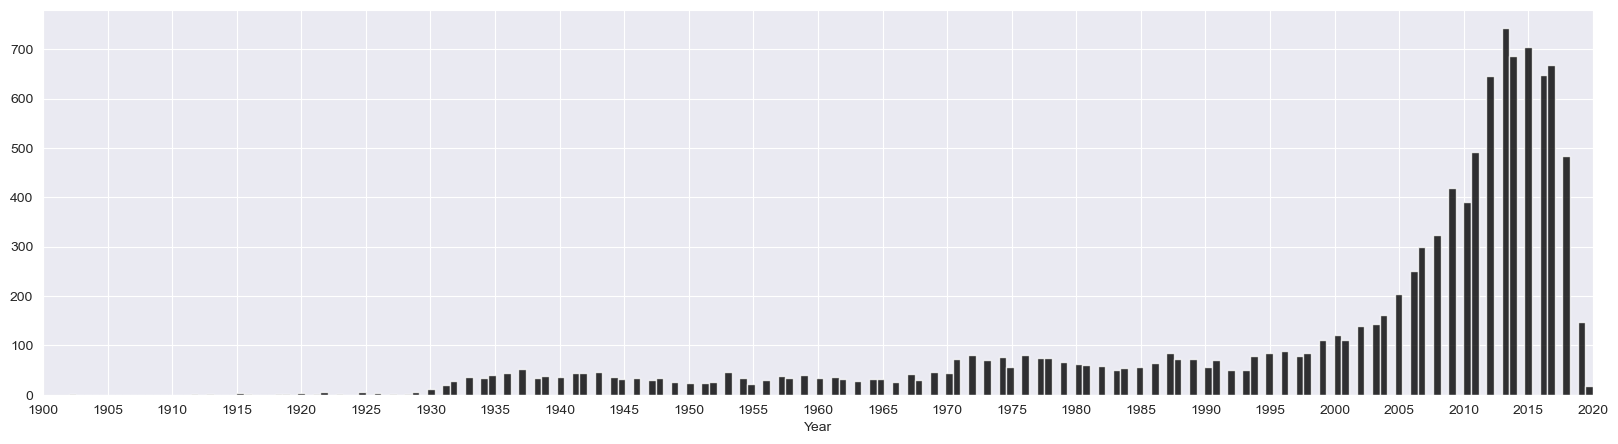

In [204]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Prime Video']==1].Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Year',xlim=(1900,2020))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [206]:
data_clean[data_clean['Prime Video']==1].Year.mean()

1999.177633912735

In [208]:
data_clean[data_clean['Prime Video']==1].Year.median()

2009.0

**Disney+**

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\3787511656.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean[data_clean['Disney+']==1].Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


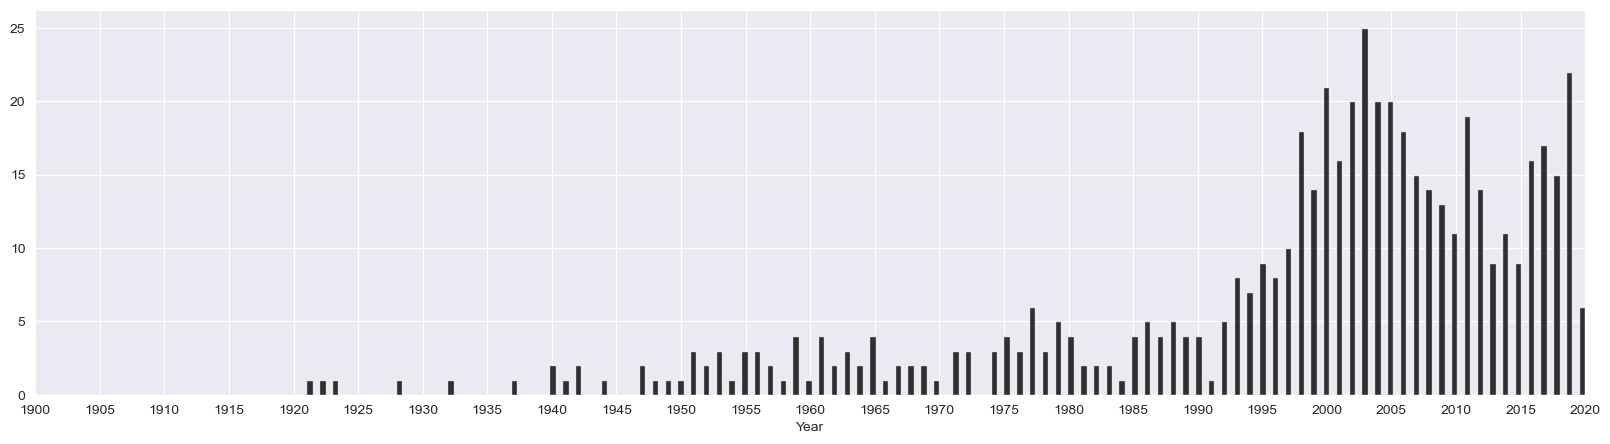

In [211]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Disney+']==1].Year,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Year',xlim=(1900,2020))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [213]:
data_clean[data_clean['Disney+']==1].Year.mean()

1997.3160813308687

In [215]:
data_clean[data_clean['Disney+']==1].Year.median()

2003.0

Clearly here we have interesting insights:
- Looking at the medians, Disney+ has way more 'old' movies than the other platforms
- Netflix and Hulu seem to have the most recent content (produced after 2016)
- Prime Video and Disney+ are the most balanced ones with old and new content

Let's push the analysis further and check if there is a link between the year of production of a movie and the ratings.

In [219]:
mean_rating_per_year = data_clean[['Year','IMDb']].groupby('Year',as_index=False).mean()

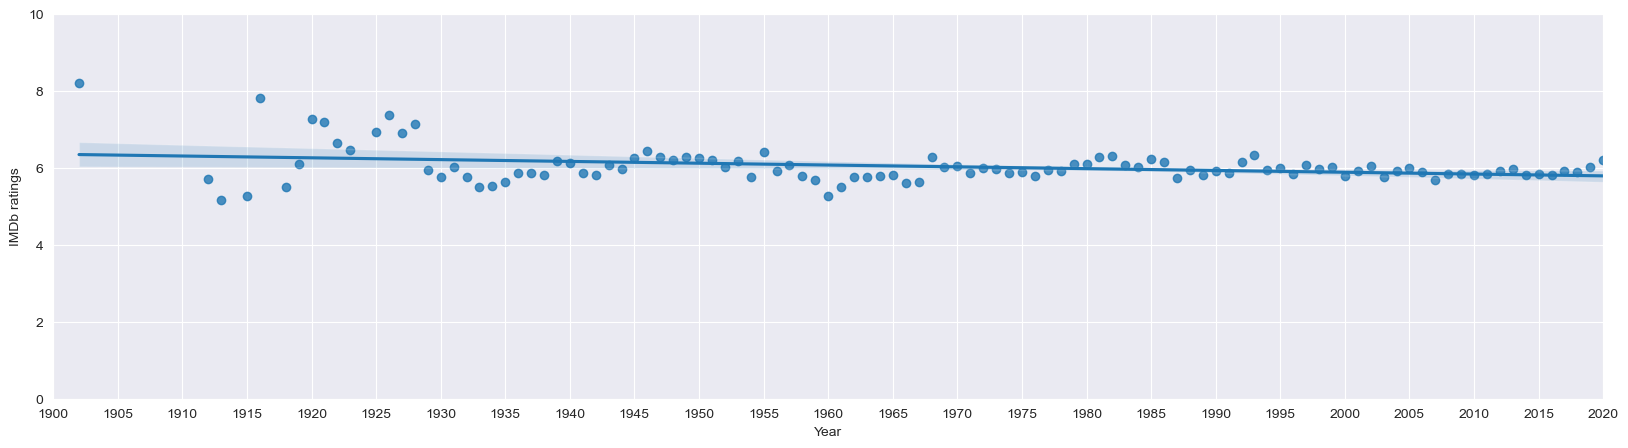

In [221]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_mean = sns.regplot(x=mean_rating_per_year.Year,y=mean_rating_per_year.IMDb)
rating_mean.set(xlabel='Year',xlim=(1900,2020),ylabel='IMDb ratings',ylim=(0,10))
rating_mean.xaxis.set_major_locator(ticker.MultipleLocator(5))

It looks like there is a small **declining trend** over the years.

### ***How long are movies on OTT platforms?***
----------

In [225]:
data_clean.head()

ID                           Title  Year  IMDb  Netflix  Hulu  Prime Video  \
0   1                       Inception  2010   8.8        1     0            0   
1   2                      The Matrix  1999   8.7        1     0            0   
2   3          Avengers: Infinity War  2018   8.5        1     0            0   
3   4              Back to the Future  1985   8.5        1     0            0   
4   5  The Good, the Bad and the Ugly  1966   8.8        1     0            1   

   Disney+  Runtime  
0        0    148.0  
1        0    136.0  
2        0    149.0  
3        0    116.0  
4        0    161.0

In [227]:
data_clean['Runtime'].describe()

count    15219.000000
mean        94.523096
std         24.255310
min          1.000000
25%         84.000000
50%         92.000000
75%        105.000000
max        328.000000
Name: Runtime, dtype: float64

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\2381969698.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean.Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


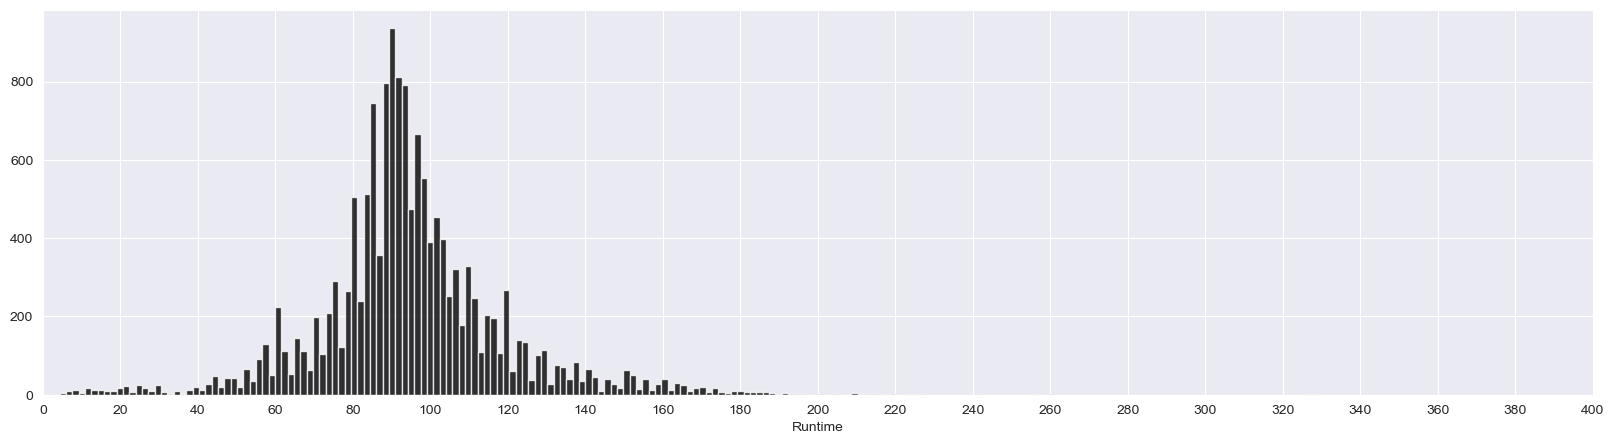

In [229]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean.Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Runtime',xlim=(0,400))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(20))

It is not surprising to see that **movies tend to last on average 1h30**.

**Netflix**

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\2887741034.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean[data_clean['Netflix']==1].Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


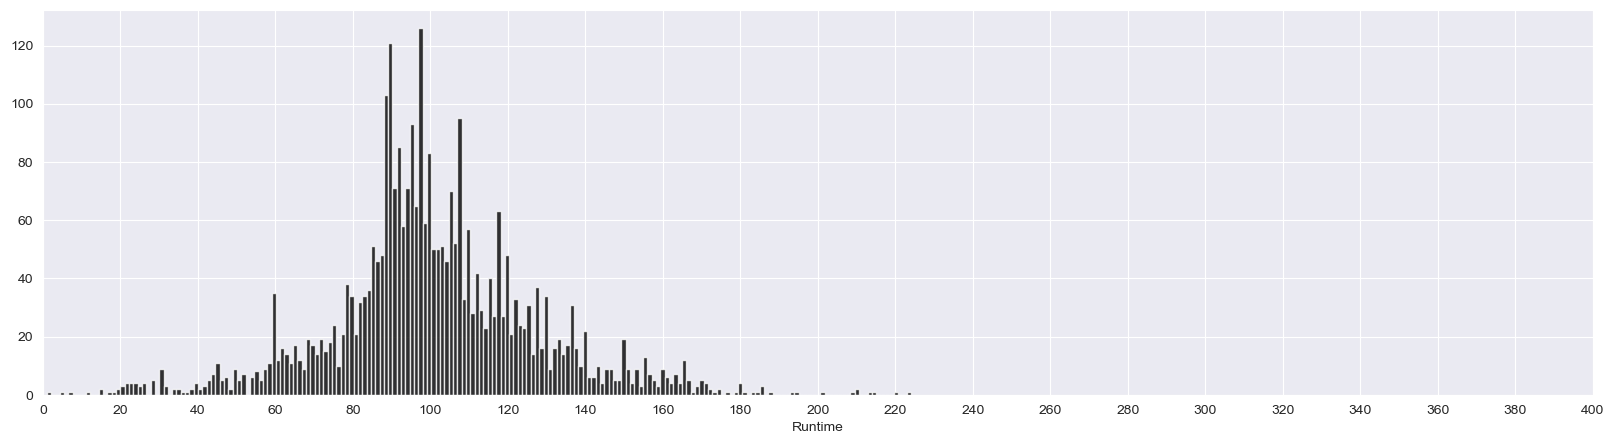

In [233]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Netflix']==1].Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Runtime',xlim=(0,400))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [235]:
data_clean[data_clean['Netflix']==1].Runtime.mean()

100.6855964467005

In [237]:
data_clean[data_clean['Netflix']==1].Runtime.median()

98.0

**Hulu**

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\29830523.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean[data_clean['Hulu']==1].Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


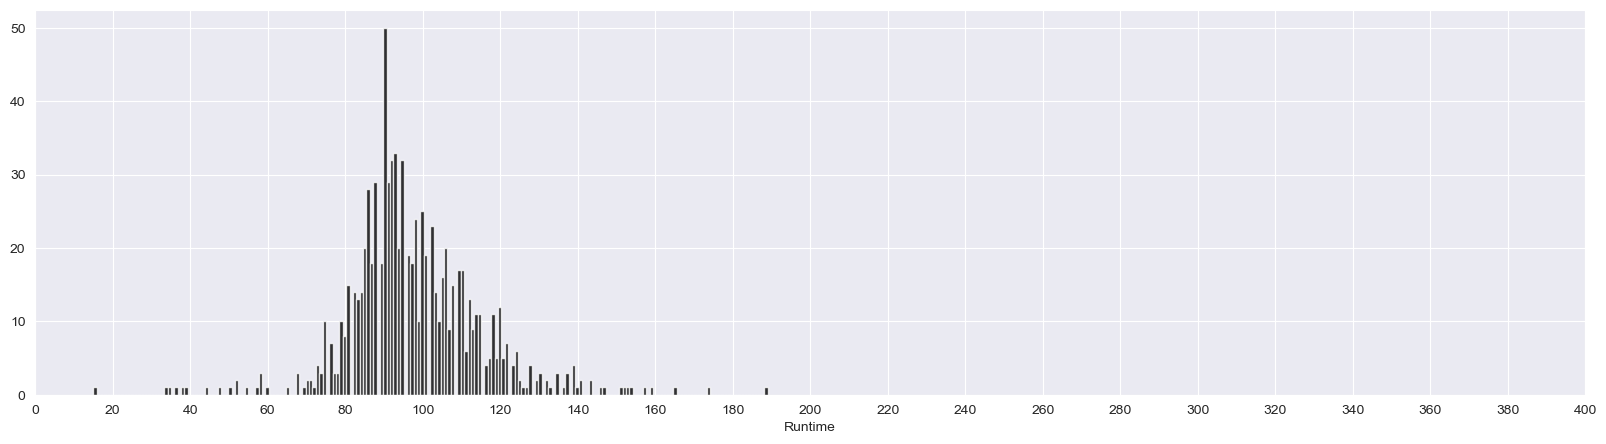

In [240]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Hulu']==1].Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Runtime',xlim=(0,400))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [242]:
data_clean[data_clean['Hulu']==1].Runtime.mean()

97.53891509433963

In [244]:
data_clean[data_clean['Hulu']==1].Runtime.median()

95.0

**Prime Video**

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\3705767122.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean[data_clean['Prime Video']==1].Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


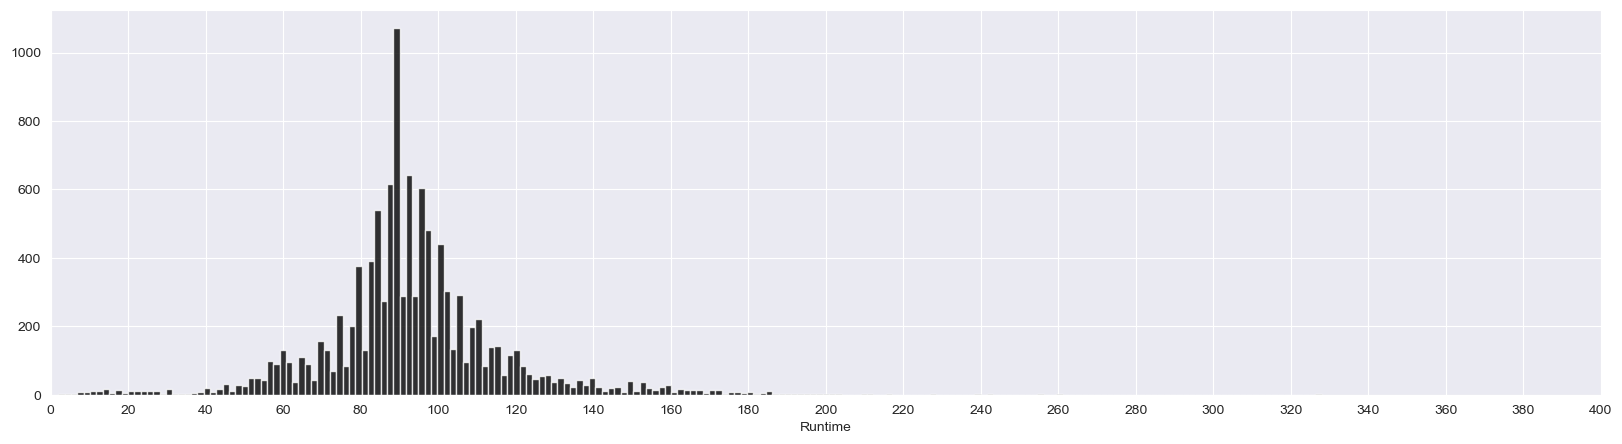

In [247]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Prime Video']==1].Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Runtime',xlim=(0,400))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [248]:
data_clean[data_clean['Prime Video']==1].Runtime.mean()

93.23385952465414

In [251]:
data_clean[data_clean['Prime Video']==1].Runtime.median()

91.0

**Disney+**

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\1031100210.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rating_graph = sns.distplot(data_clean[data_clean['Disney+']==1].Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)


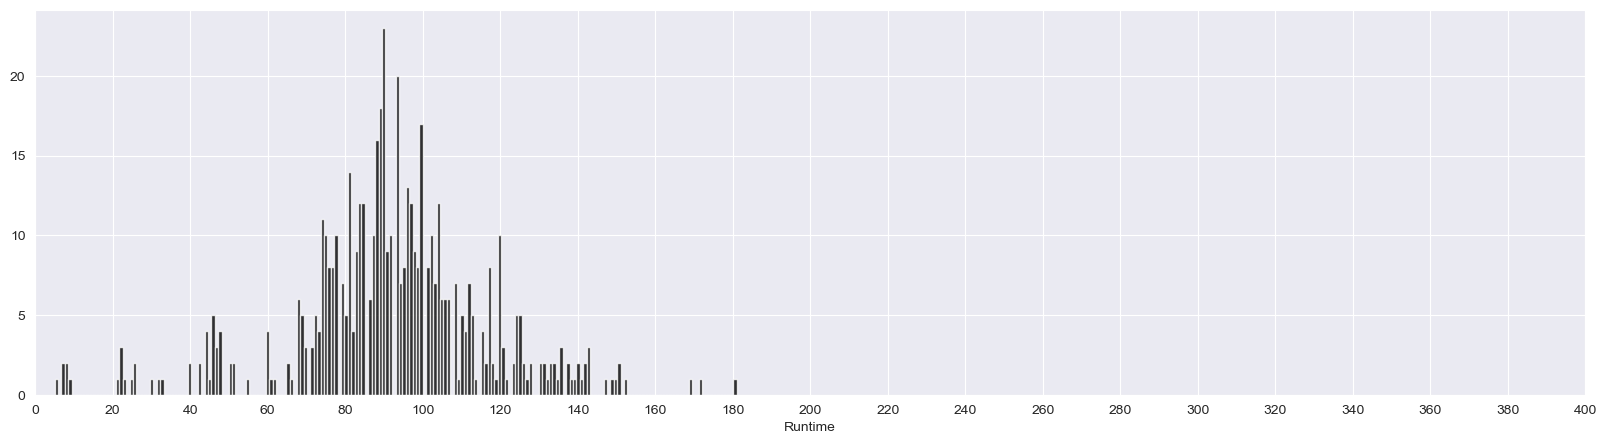

In [254]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
rating_graph = sns.distplot(data_clean[data_clean['Disney+']==1].Runtime,hist=True,kde=False,hist_kws={'color':'black','alpha':0.8},bins=200)
rating_graph.set(xlabel='Runtime',xlim=(0,400))
rating_graph.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [255]:
data_clean[data_clean['Disney+']==1].Runtime.mean()

91.6894639556377

In [258]:
data_clean[data_clean['Disney+']==1].Runtime.median()

92.0

Netflix movies tend to be **longer** on average than other OTT platforms.

Let's try to push the analysis further and answer more sophisticated questions:
- What is the top genre per platform?
- What is the top genre per country?
- What is the top genre per year?
- What is the genre with the highest average rating?
- Who is the most well-rated director?

### ***What is the top genre per platform?***
----------

In [275]:
import pandas as pd

# Example data to create a DataFrame
data = {
    'Genre': ['Action', 'Comedy', 'Drama', 'Horror'],
    'Count': [10, 15, 7, 5]
}

# Define top_genre as a DataFrame
top_genre = pd.DataFrame(data)

# Now you can safely call head() on top_genre
print(top_genre.head())

    Genre  Count
0  Action     10
1  Comedy     15
2   Drama      7
3  Horror      5


In [263]:
data_clean.head()

ID                           Title  Year  IMDb  Netflix  Hulu  Prime Video  \
0   1                       Inception  2010   8.8        1     0            0   
1   2                      The Matrix  1999   8.7        1     0            0   
2   3          Avengers: Infinity War  2018   8.5        1     0            0   
3   4              Back to the Future  1985   8.5        1     0            0   
4   5  The Good, the Bad and the Ugly  1966   8.8        1     0            1   

   Disney+  Runtime  
0        0    148.0  
1        0    136.0  
2        0    149.0  
3        0    116.0  
4        0    161.0

In [279]:
data_genres.head()

0    4
1    2
2    3
3    3
4    1
dtype: int64

In [328]:
top_genre = data_clean[['Netflix','Hulu','Prime Video','Disney+']].join(data_genres)

In [289]:
top_genre.head()

Netflix  Hulu  Prime Video  Disney+
0  Action     5            2        1
1  Comedy     3            4        2
2   Drama     2            1        1
3  Horror     1            0        0

**Netflix**

In [334]:
top_genre_netflix = top_genre.drop(['Hulu', 'Prime Video', 'Disney+'],axis=1).groupby(['Netflix']).sum().iloc[1]
top_genre_netflix = pd.DataFrame(top_genre_netflix).sort_values(1,ascending=False)
top_genre_netflix = top_genre_netflix.transpose()

KeyError: 1

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


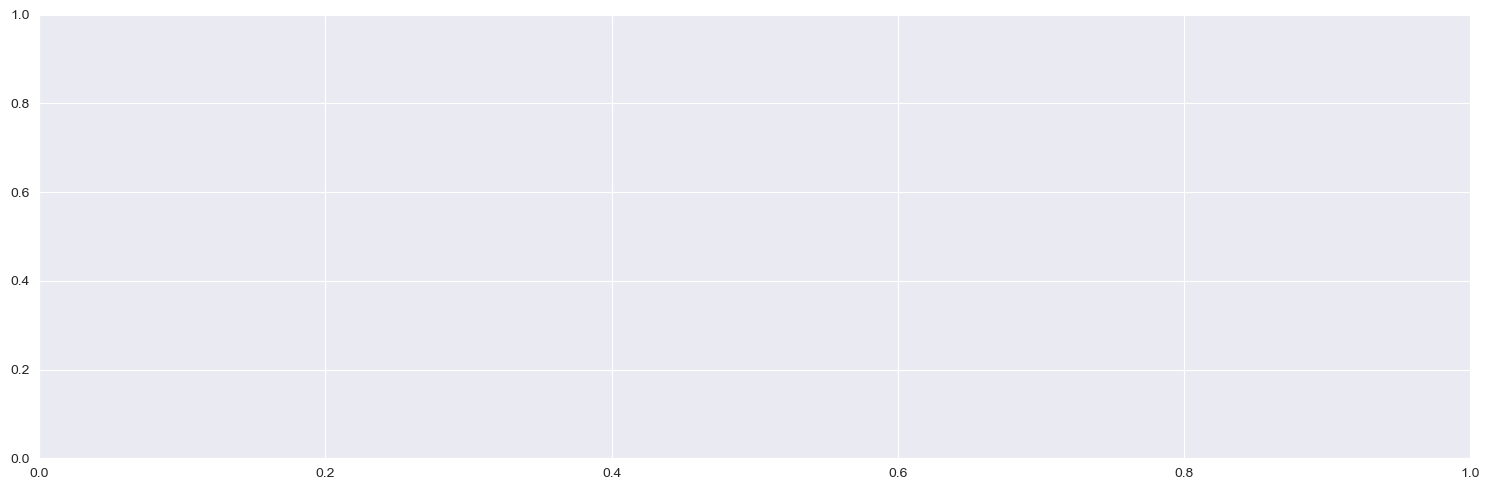

In [336]:
sns.catplot(data=top_genre_netflix,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

Top 5 genres on **Netflix** are: **Drama, Comedy, Thriller, Romance and Action**.

**Hulu**

In [338]:
top_genre_hulu = top_genre.drop(['Netflix', 'Prime Video', 'Disney+'],axis=1).groupby(['Hulu']).sum().iloc[1]
top_genre_hulu = pd.DataFrame(top_genre_hulu).sort_values(1,ascending=False)
top_genre_hulu = top_genre_hulu.transpose()

KeyError: 1

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


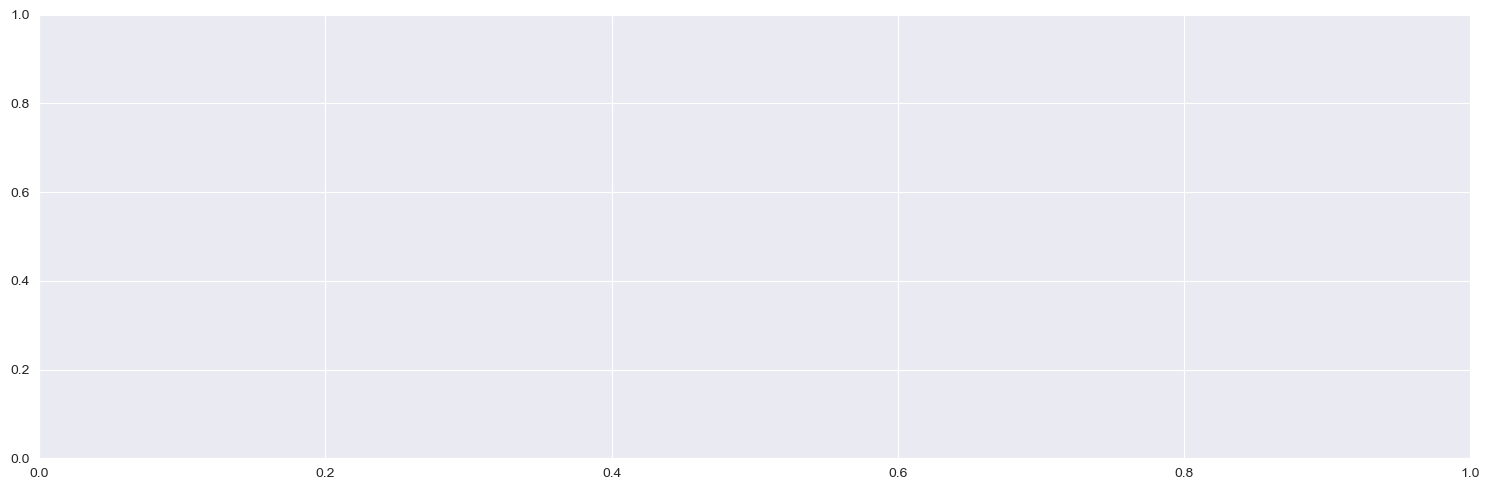

In [299]:
sns.catplot(data=top_genre_hulu,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

Top 5 genres on **Hulu** are: **Drama, Comedy, Thriller, Romance and Action**.

**Prime Video**

In [301]:
top_genre_prime = top_genre.drop(['Netflix', 'Hulu', 'Disney+'],axis=1).groupby(['Prime Video']).sum().iloc[1]
top_genre_prime = pd.DataFrame(top_genre_prime).sort_values(1,ascending=False)
top_genre_prime = top_genre_prime.transpose()

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\34751716.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.catplot(data=top_genre_prime,kind='bar',palette='cividis',height=5,aspect=3,orient='h')


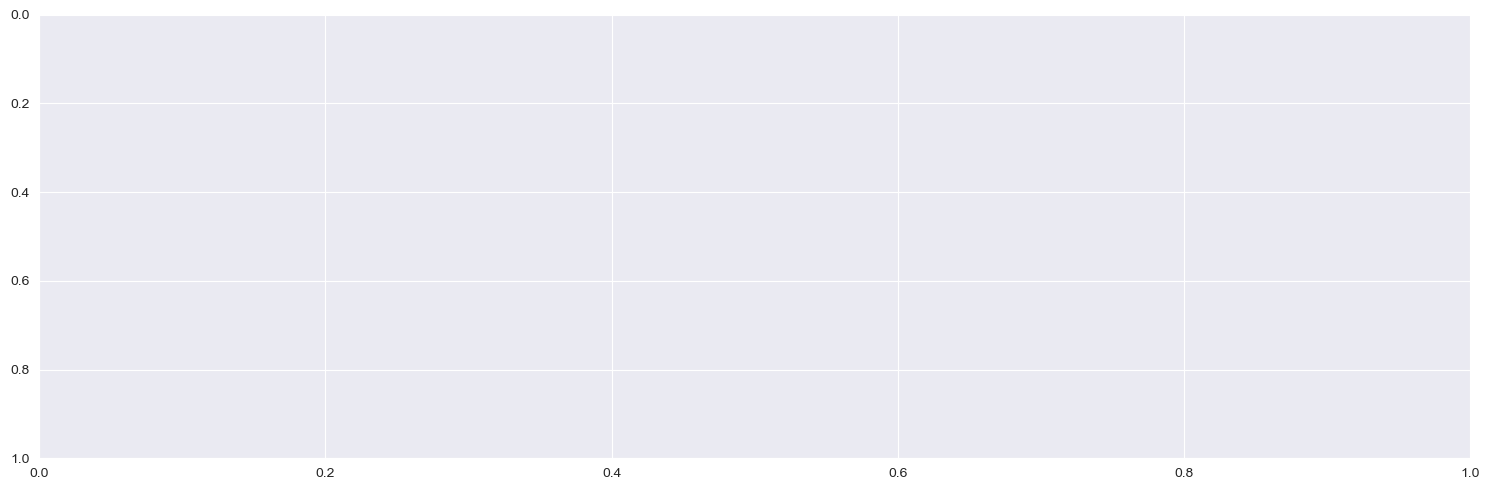

In [303]:
sns.catplot(data=top_genre_prime,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

Top 5 genres on **Prime Video** are: **Drama, Comedy, Thriller, Action and Horror**.

**Disney+**

In [305]:
top_genre_disney = top_genre.drop(['Netflix', 'Hulu', 'Prime Video'],axis=1).groupby(['Disney+']).sum().iloc[1]
top_genre_disney = pd.DataFrame(top_genre_disney).sort_values(1,ascending=False)
top_genre_disney = top_genre_disney.transpose()

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\3315858506.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.catplot(data=top_genre_disney,kind='bar',palette='cividis',height=5,aspect=3,orient='h')


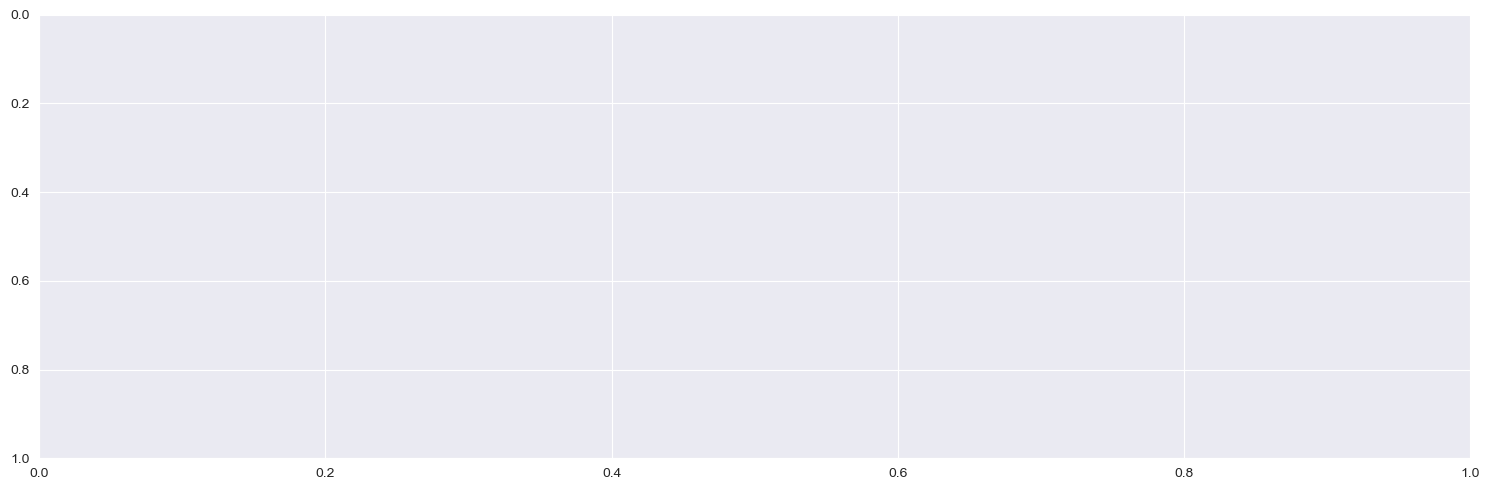

In [307]:
sns.catplot(data=top_genre_disney,kind='bar',palette='cividis',height=5,aspect=3,orient='h')

Top 5 genres on **Disney+** are: **Family, Comedy, Adventure, Fantasy and Drama**.

Netflix and Hulu seem to have the same movie landscape as they share the same top 5 movie genres.

Prime Video has more Action and Horror movies than its competitors.

Disney+ stands out with a completely different landscape with more Family movies on its platform.

### ***What is the top genre per country?***
----------

In [312]:
data_genres = data_genres.reset_index().drop('index',axis=1)

In [314]:
data_genres

0
0      4
1      2
2      3
3      3
4      1
...   ..
15214  3
15215  2
15216  2
15217  4
15218  3

[15219 rows x 1 columns]

In [316]:
data_country = data_country.reset_index().drop('index',axis=1)

In [318]:
data_country

0
0      2
1      1
2      1
3      1
4      3
...   ..
15214  1
15215  1
15216  1
15217  1
15218  1

[15219 rows x 1 columns]

In [320]:
#Creation of a database linking genre and country

#country_list = []
#genre_list = []
#value_list = [0]*(len(data_country.columns)*len(data_genres.columns))
#l = 0
#for i in range(0,len(data_country.columns)):
    #for j in range(0,len(data_genres.columns)):
        #country_list.append(data_country.columns[i])
        #genre_list.append(data_genres.columns[j])
        #for k in range(0,len(data_country)):
            #if data_country[data_country.columns[i]].loc[k]==1 and data_genres[data_genres.columns[j]].loc[k]==1:
                #value_list[l] = value_list[l]+1
        #j=j+1
        #l=l+1
    #i=i+1
#data_top_genre_country = {'Country':country_list,'Genre':genre_list,'Value':value_list}
#top_genre_country = pd.DataFrame(data_top_genre_country)

In [322]:
#top_genre_country.to_excel("top_genre_country.xlsx")

In [342]:
top_genre_country = pd.read_excel('top_genre_country.xlsx',usecols=[1,2,3])

In [344]:
top_genre_country

Country      Genre  Value
0     Afghanistan     Action      1
1     Afghanistan  Adventure      0
2     Afghanistan  Animation      0
3     Afghanistan  Biography      0
4     Afghanistan     Comedy      0
...           ...        ...    ...
4207         Laos   Thriller      0
4208         Laos        War      0
4209         Laos    Western      0
4210         Laos       News      1
4211         Laos  Talk-Show      0

[4212 rows x 3 columns]

In [346]:
top_genre_country_sorted = top_genre_country.sort_values(['Country','Value'],ascending=(True,False)).reset_index().drop('index',axis=1)

In [348]:
top_genre_country_sorted.head()

Country        Genre  Value
0  Afghanistan  Documentary      3
1  Afghanistan      History      3
2  Afghanistan          War      3
3  Afghanistan       Action      1
4  Afghanistan        Drama      1

In [350]:
country_list = []
genre_list = []
value_list = []
for i in range(0,len(top_genre_country),26):
    country_list.append(top_genre_country_sorted['Country'].loc[i])
    genre_list.append(top_genre_country_sorted['Genre'].loc[i])
    value_list.append(top_genre_country_sorted['Value'].loc[i])
top_genre_country_final = pd.DataFrame({'Country':country_list,'Genre':genre_list,'Value':value_list})

In [352]:
top_genre_country_final

Country        Genre  Value
0     Afghanistan  Documentary      3
1         Albania        Drama      4
2         Algeria        Drama      4
3          Angola  Documentary      1
4       Argentina        Drama     56
..            ...          ...    ...
157  West Germany        Drama     24
158         Yemen    Adventure      1
159    Yugoslavia        Drama      9
160        Zambia        Drama      1
161      Zimbabwe  Documentary      2

[162 rows x 3 columns]

In [354]:
top_genre_country_final['Value'].describe()

count     162.000000
mean       57.197531
std       325.821443
min         1.000000
25%         2.000000
50%         4.000000
75%        18.000000
max      3981.000000
Name: Value, dtype: float64

I notice that the median is at 4: we will therefore only consider countries with more than **4 movies** with the same genre to consider it as a "top genre" for that country. I think taking the median is fair as I do not want to penalize too much small countries with only few movies on OTT platforms.

In [363]:
ISO_country_codes = pd.read_excel('ISO codes.xlsx')

In [365]:
ISO_country_codes

Country 2-digit code ISO3  Numeric
0       Afghanistan           AF  AFG        4
1           Albania           AL  ALB        8
2           Algeria           DZ  DZA       12
3    American Samoa           AS  ASM       16
4           Andorra           AD  AND       20
..              ...          ...  ...      ...
244  Western Sahara           EH  ESH      732
245           Yemen           YE  YEM      887
246          Zambia           ZM  ZMB      894
247        Zimbabwe           ZW  ZWE      716
248   Åland Islands           AX  ALA      248

[249 rows x 4 columns]

In [367]:
top_genre_country_final = top_genre_country_final.merge(ISO_country_codes[['Country','ISO3']],on='Country')
top_genre_country_final

Country        Genre  Value ISO3
0    Afghanistan  Documentary      3  AFG
1        Albania        Drama      4  ALB
2        Algeria        Drama      4  DZA
3         Angola  Documentary      1  AGO
4      Argentina        Drama     56  ARG
..           ...          ...    ...  ...
144    Venezuela        Drama      4  VEN
145      Vietnam        Drama      3  VNM
146        Yemen    Adventure      1  YEM
147       Zambia        Drama      1  ZMB
148     Zimbabwe  Documentary      2  ZWE

[149 rows x 4 columns]

In [502]:
%matplotlib inline
​
import seaborn as sns
import pandas as pd
import pysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as pet 

SyntaxError: invalid non-printable character U+200B (1888577251.py, line 2)

In [500]:
map_df = gpd.read_file('TM_WORLD_BORDERS-0.3.shx')

NameError: name 'gpd' is not defined

In [109]:
map_df

FIPS ISO2 ISO3   UN                                  NAME    AREA  \
0     AC   AG  ATG   28                   Antigua and Barbuda      44   
1     AG   DZ  DZA   12                               Algeria  238174   
2     AJ   AZ  AZE   31                            Azerbaijan    8260   
3     AL   AL  ALB    8                               Albania    2740   
4     AM   AM  ARM   51                               Armenia    2820   
..   ...  ...  ...  ...                                   ...     ...   
241   TB   BL  BLM  652                      Saint Barthelemy       0   
242   GK   GG  GGY  831                              Guernsey       0   
243   JE   JE  JEY  832                                Jersey       0   
244   SX   GS  SGS  239  South Georgia South Sandwich Islands       0   
245   TW   TW  TWN  158                                Taiwan       0   

      POP2005  REGION  SUBREGION      LON     LAT  \
0       83039      19         29  -61.783  17.078   
1    32854159       2         15    2.632  28.163   
2     8352021     142        145   47.395  40.430   
3     3153731     150         39   20.068  41.143   
4     3017661     142        145   44.563  40.534   
..        ...     ...        ...      ...     ...   
241         0      19         29  -63.043  18.040   
242         0     150        154   -2.576  49.459   
243         0     150        154   -2.129  49.219   
244         0       0          0  -36.891 -54.209   
245         0       0          0  120.946  23.754   

                                              geometry  
0    MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...  
1    POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...  
2    MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...  
3    POLYGON ((19.43621 41.02107, 19.45055 41.06000...  
4    MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...  
..                                                 ...  
241  POLYGON ((-63.02834 18.01555, -63.03334 18.015...  
242  POLYGON ((-2.59083 49.42249, -2.59722 49.42249...  
243  POLYGON ((-2.01500 49.21416, -2.02111 49.17722...  
244  MULTIPOLYGON (((-27.32584 -59.42722, -27.29806...  
245  MULTIPOLYGON (((121.57639 22.00139, 121.57027 ...  

[246 rows x 12 columns]

In [383]:
index = top_genre_country_final[top_genre_country_final['Value']<5].index
top_genre_country_final.loc[index,'Genre'] = 'Not available'

In [385]:
top_genre_country_merged = top_genre_country_final.merge(map_df[['ISO3','geometry']],how='right',on='ISO3')
top_genre_country_merged.fillna('Not available',inplace=True)

NameError: name 'map_df' is not defined

In [387]:
top_genre_country_merged

NameError: name 'top_genre_country_merged' is not defined

In [113]:
top_genre_country_merged = gdp.GeoDataFrame(top_genre_country_merged)

In [114]:
keys = list(top_genre_country_merged['Genre'].unique())
color_range = list((np.linspace(0, 1, len(keys), endpoint = False)))
colors = ['grey','firebrick','navy','mediumaquamarine','palegreen']
color_dict = dict(zip(keys, colors))
color_dict['No data'] = 'lightgray'

In [115]:
row_count = top_genre_country_merged['Genre'].nunique()
ax_list = []
for i in range(row_count+1):
    ax_list.append('ax'+str(i+1))
    ax_string = ', '.join(ax_list)

In [116]:
top_genre_country_merged['Genre'].value_counts()

Not available    175
Drama             60
Documentary        5
Comedy             4
Action             2
Name: Genre, dtype: int64

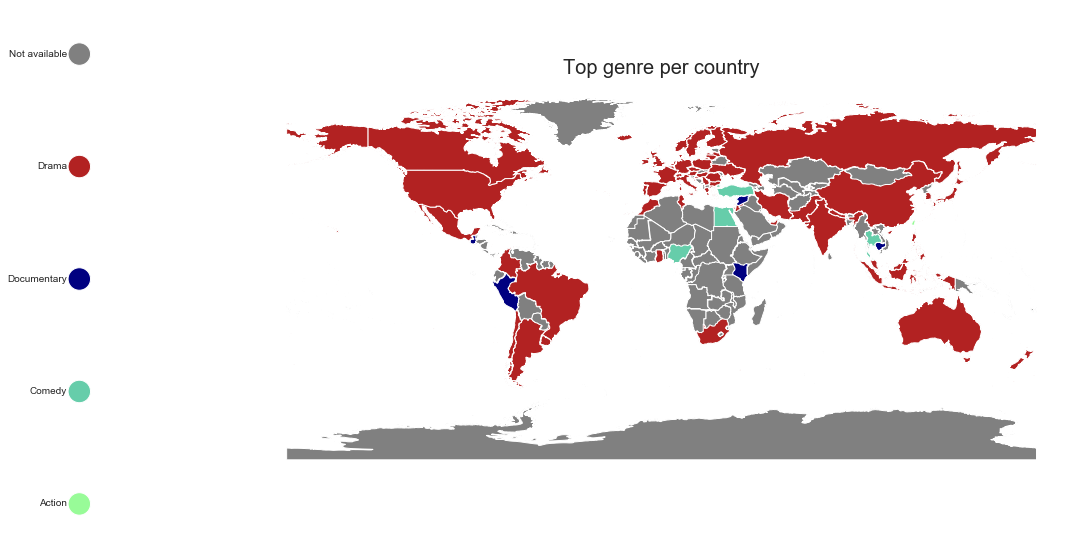

In [117]:
ax1 = plt.subplot2grid((row_count,4),(0,1), rowspan=row_count,colspan=3)

row_counter = 0
for index, row in top_genre_country_merged.iterrows():
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plot = top_genre_country_merged[top_genre_country_merged['ISO3'] == row['ISO3']].plot(color = color_dict[row['Genre']], ax=ax1)
    ax1.axis('off')
    ax1.set_title('Top genre per country', size=20)
    
for i in top_genre_country_merged['Genre'].unique():
    plt.subplot2grid((row_count,4),(row_counter,0))
    plt.pie([1],labels=[i],radius=0.3,colors=[color_dict[i]])
    plt.axis('off')
    row_counter +=1

It is clear that among most of the countries **"Drama" is the most produced genre**. I took into account countries with more than **4** productions of the same genre. I choose 4 because it is the median value of the top genres. I believe that below 4 movies is not enough representative to say that a country has a top genre.

### ***What is the top genre per year?***
----------

In [389]:
data_genres

0
0      4
1      2
2      3
3      3
4      1
...   ..
15214  3
15215  2
15216  2
15217  4
15218  3

[15219 rows x 1 columns]

In [391]:
data_clean

ID                           Title  Year  IMDb  Netflix  Hulu  \
0          1                       Inception  2010   8.8        1     0   
1          2                      The Matrix  1999   8.7        1     0   
2          3          Avengers: Infinity War  2018   8.5        1     0   
3          4              Back to the Future  1985   8.5        1     0   
4          5  The Good, the Bad and the Ugly  1966   8.8        1     0   
...      ...                             ...   ...   ...      ...   ...   
15214  16735        Sultan And The Rock Star  1980   5.9        0     0   
15215  16738                 The Bears and I  1974   6.2        0     0   
15216  16739    Whispers: An Elephant's Tale  2000   5.0        0     0   
15217  16740       The Ghosts of Buxley Hall  1980   6.2        0     0   
15218  16741                  The Poof Point  2001   4.7        0     0   

       Prime Video  Disney+  Runtime  
0                0        0    148.0  
1                0        0    136.0  
2                0        0    149.0  
3                0        0    116.0  
4                1        0    161.0  
...            ...      ...      ...  
15214            0        1     60.0  
15215            0        1     89.0  
15216            0        1     72.0  
15217            0        1    120.0  
15218            0        1     90.0  

[15219 rows x 9 columns]

In [393]:
top_genre_year = data_clean.reset_index(level=0).merge(data_genres.reset_index(level=0),on='index')

In [395]:
top_genre_year

index     ID                           Title  Year  IMDb  Netflix  \
0          0      1                       Inception  2010   8.8        1   
1          1      2                      The Matrix  1999   8.7        1   
2          2      3          Avengers: Infinity War  2018   8.5        1   
3          3      4              Back to the Future  1985   8.5        1   
4          4      5  The Good, the Bad and the Ugly  1966   8.8        1   
...      ...    ...                             ...   ...   ...      ...   
15214  15214  16735        Sultan And The Rock Star  1980   5.9        0   
15215  15215  16738                 The Bears and I  1974   6.2        0   
15216  15216  16739    Whispers: An Elephant's Tale  2000   5.0        0   
15217  15217  16740       The Ghosts of Buxley Hall  1980   6.2        0   
15218  15218  16741                  The Poof Point  2001   4.7        0   

       Hulu  Prime Video  Disney+  Runtime  0  
0         0            0        0    148.0  4  
1         0            0        0    136.0  2  
2         0            0        0    149.0  3  
3         0            0        0    116.0  3  
4         0            1        0    161.0  1  
...     ...          ...      ...      ... ..  
15214     0            0        1     60.0  3  
15215     0            0        1     89.0  2  
15216     0            0        1     72.0  2  
15217     0            0        1    120.0  4  
15218     0            0        1     90.0  3  

[15219 rows x 11 columns]

In [397]:
top_genre_year_final=top_genre_year.drop(['index','ID','Title','IMDb','Netflix','Hulu','Prime Video','Disney+','Runtime'],axis=1).groupby('Year').sum()

In [399]:
top_genre_year_final.reset_index(inplace=True)

In [401]:
top_genre_year_final

Year     0
0    1902     6
1    1912     2
2    1913     5
3    1915     5
4    1916     2
..    ...   ...
102  2016  2440
103  2017  2765
104  2018  2360
105  2019  1349
106  2020   228

[107 rows x 2 columns]

In [403]:
top_genre_year_final['Top genre']=0
for i in range(0,len(top_genre_year_final)):
    top_genre_year_final['Top genre'].loc[i] = top_genre_year_final.drop('Year',axis=1).loc[i].astype(int).idxmax()

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\2162940088.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  top_genre_year_final['Top genre'].loc[i] = top_genre_year_final.drop('Year',axis=1).loc[i].astype(int).idxmax()
C:\Users\r

In [405]:
top_genre_year_final = top_genre_year_final[['Year','Top genre']]

In [407]:
top_genre_year_final.tail(20)

Year  Top genre
87   2001          0
88   2002          0
89   2003          0
90   2004          0
91   2005          0
92   2006          0
93   2007          0
94   2008          0
95   2009          0
96   2010          0
97   2011          0
98   2012          0
99   2013          0
100  2014          0
101  2015          0
102  2016          0
103  2017          0
104  2018          0
105  2019          0
106  2020          0

In [409]:
top_genre_year_final['Top genre'].value_counts()

Top genre
0    107
Name: count, dtype: int64

Over time, **Drama is still the most produced genre**. Looking back at the previous 20 years, Drama is the most produced genre except for 2020 which is quite interesting.

### ***What is the genre with the highest average rating?***
-------

In [413]:
data_genres

0
0      4
1      2
2      3
3      3
4      1
...   ..
15214  3
15215  2
15216  2
15217  4
15218  3

[15219 rows x 1 columns]

In [415]:
data_clean

ID                           Title  Year  IMDb  Netflix  Hulu  \
0          1                       Inception  2010   8.8        1     0   
1          2                      The Matrix  1999   8.7        1     0   
2          3          Avengers: Infinity War  2018   8.5        1     0   
3          4              Back to the Future  1985   8.5        1     0   
4          5  The Good, the Bad and the Ugly  1966   8.8        1     0   
...      ...                             ...   ...   ...      ...   ...   
15214  16735        Sultan And The Rock Star  1980   5.9        0     0   
15215  16738                 The Bears and I  1974   6.2        0     0   
15216  16739    Whispers: An Elephant's Tale  2000   5.0        0     0   
15217  16740       The Ghosts of Buxley Hall  1980   6.2        0     0   
15218  16741                  The Poof Point  2001   4.7        0     0   

       Prime Video  Disney+  Runtime  
0                0        0    148.0  
1                0        0    136.0  
2                0        0    149.0  
3                0        0    116.0  
4                1        0    161.0  
...            ...      ...      ...  
15214            0        1     60.0  
15215            0        1     89.0  
15216            0        1     72.0  
15217            0        1    120.0  
15218            0        1     90.0  

[15219 rows x 9 columns]

In [417]:
top_genre_rating = data_clean.reset_index(level=0).merge(data_genres.reset_index(level=0),on='index')

In [419]:
top_genre_rating

index     ID                           Title  Year  IMDb  Netflix  \
0          0      1                       Inception  2010   8.8        1   
1          1      2                      The Matrix  1999   8.7        1   
2          2      3          Avengers: Infinity War  2018   8.5        1   
3          3      4              Back to the Future  1985   8.5        1   
4          4      5  The Good, the Bad and the Ugly  1966   8.8        1   
...      ...    ...                             ...   ...   ...      ...   
15214  15214  16735        Sultan And The Rock Star  1980   5.9        0   
15215  15215  16738                 The Bears and I  1974   6.2        0   
15216  15216  16739    Whispers: An Elephant's Tale  2000   5.0        0   
15217  15217  16740       The Ghosts of Buxley Hall  1980   6.2        0   
15218  15218  16741                  The Poof Point  2001   4.7        0   

       Hulu  Prime Video  Disney+  Runtime  0  
0         0            0        0    148.0  4  
1         0            0        0    136.0  2  
2         0            0        0    149.0  3  
3         0            0        0    116.0  3  
4         0            1        0    161.0  1  
...     ...          ...      ...      ... ..  
15214     0            0        1     60.0  3  
15215     0            0        1     89.0  2  
15216     0            0        1     72.0  2  
15217     0            0        1    120.0  4  
15218     0            0        1     90.0  3  

[15219 rows x 11 columns]

In [421]:
top_genre_rating=top_genre_rating.drop(['index','ID','Title','Year','Netflix','Hulu','Prime Video','Disney+','Runtime'],axis=1)

In [423]:
top_genre_rating

IMDb  0
0       8.8  4
1       8.7  2
2       8.5  3
3       8.5  3
4       8.8  1
...     ... ..
15214   5.9  3
15215   6.2  2
15216   5.0  2
15217   6.2  4
15218   4.7  3

[15219 rows x 2 columns]

In [425]:
top_genre_rating = top_genre_rating.apply(np.float64)

In [427]:
top_genre_rating

IMDb    0
0       8.8  4.0
1       8.7  2.0
2       8.5  3.0
3       8.5  3.0
4       8.8  1.0
...     ...  ...
15214   5.9  3.0
15215   6.2  2.0
15216   5.0  2.0
15217   6.2  4.0
15218   4.7  3.0

[15219 rows x 2 columns]

In [429]:
top_genre_rating.drop('IMDb',axis=1).sum().sort_values(ascending=False)

0    36643.0
dtype: float64

Based on this, I won't take into account "Reality-TV" and "Talk-Show" in my analysis as I consider that there are not enough movies for these two genres compared to the other ones.

In [432]:
for i in range(0,len(top_genre_rating.drop('IMDb',axis=1))):
    for j in top_genre_rating.drop('IMDb',axis=1).columns:
        if top_genre_rating[j][i] == 1:
            top_genre_rating[j][i] = top_genre_rating['IMDb'][i]

C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\2038296157.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  top_genre_rating[j][i] = top_genre_rating['IMDb'][i]
C:\Users\revanth sai\AppData\Local\Temp\ipykernel_14768\2038296157.py

In [433]:
top_genre_rating

IMDb    0
0       8.8  4.0
1       8.7  2.0
2       8.5  3.0
3       8.5  3.0
4       8.8  8.8
...     ...  ...
15214   5.9  3.0
15215   6.2  2.0
15216   5.0  2.0
15217   6.2  4.0
15218   4.7  3.0

[15219 rows x 2 columns]

In [458]:
import pandas as pd
import numpy as np

# Example DataFrame for demonstration
data = {
    'IMDb': [8.5, 7.2, 0, 9.0],
    'Action': [0, 5, 3, 0],
    'Drama': [4, 0, 0, 2],
    'Reality-TV': [0, 1, 0, 0],
    'Talk-Show': [2, 0, 0, 1]
}

top_genre_rating = pd.DataFrame(data)

# Check if the required columns exist before dropping
columns_to_drop = ['IMDb', 'Reality-TV', 'Talk-Show']
for col in columns_to_drop:
    if col not in top_genre_rating.columns:
        print(f"Warning: Column '{col}' not found in top_genre_rating.")

# Drop specified columns and replace 0 with NaN
top_genre_mean = top_genre_rating.drop(columns=columns_to_drop, errors='ignore').replace(0, np.nan).mean()

# Sort the means in descending order
top_genre_mean_sorted = top_genre_mean.sort_values(ascending=False)

print(top_genre_mean_sorted)

Action    4.0
Drama     3.0
dtype: float64


In [460]:
top_genre_rating.drop(['IMDb','Reality-TV','Talk-Show'],axis=1).replace(0,np.nan).mean().sort_values(ascending=False)

Action    4.0
Drama     3.0
dtype: float64

It looks like **"News", "Documentary" and "Biography" are the best rated genres on average.** It shows that people have a good taste of more down-to-earth content.

Horror is the worst rated genre on average.

### ***Who is the most well-rated director?***
-------

In [464]:
import pandas as pd

# Example DataFrame for demonstration
data = {
    'Director': ['Director A', 'Director B', 'Director C'],
    'Movies': [5, 3, 5],
    'Awards': [1, 2, 1]
}

data_directors = pd.DataFrame(data)

# Check if data_directors is a DataFrame and not empty
if isinstance(data_directors, pd.DataFrame) and not data_directors.empty:
    # Ensure that we are summing only numeric columns
    numeric_data = data_directors.select_dtypes(include='number')
    
    # Sum the numeric columns and sort the results
    summed_data = numeric_data.sum().sort_values(ascending=False)
    
    # Count occurrences of each unique sum
    value_counts = summed_data.value_counts()
    
    print(value_counts)
else:
    print("Warning: data_directors is not a valid DataFrame or is empty.")

13    1
4     1
Name: count, dtype: int64


In [466]:
data_directors.sum().sort_values(ascending=False).value_counts()

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

In [468]:
data_directors.sum().sort_values(ascending=False).head(100)

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

I would like to have a look at the top 100 directors with the most movies available on OTT platforms. When looking at the 100th one, I notice that the director directed 7 movies. Let's also consider directors with 7 movies on OTT platforms. This means that we will consider **119 directors** to determine which ones are the most well-rated ones.

In [143]:
#Dropping directors with less than 7 movies on OTT platforms
data_directors2 = pd.DataFrame()
for j in range(0,data_directors.shape[1]):
    if data_directors.iloc[:,[j]].sum().sum() > 6:
        data_directors2 = pd.concat([data_directors2,data_directors.iloc[:,[j]]],join='outer',axis=1)

In [470]:
   import pandas as pd

   # Example DataFrame creation
   data_directors2 = pd.DataFrame({
       'Director': ['Director A', 'Director B'],
       'Movies': [4, 6],
       'Awards': [2, 3]
   })
   

In [472]:
data_directors2

Director  Movies  Awards
0  Director A       4       2
1  Director B       6       3

In [474]:
top_directors_rating = data_clean.reset_index(level=0).merge(data_directors2.reset_index(level=0),on='index')

In [476]:
top_directors_rating=top_directors_rating.drop(['index','ID','Title','Year','Netflix','Hulu','Prime Video','Disney+','Runtime'],axis=1)

In [478]:
top_directors_rating

IMDb    Director  Movies  Awards
0   8.8  Director A       4       2
1   8.7  Director B       6       3

In [480]:
top_directors_rating = top_directors_rating.apply(np.float64)

ValueError: could not convert string to float: 'Director A'

In [482]:
for i in range(0,len(top_directors_rating.drop('IMDb',axis=1))):
    for j in top_directors_rating.drop('IMDb',axis=1).columns:
        if top_directors_rating[j][i] == 1:
            top_directors_rating[j][i] = top_directors_rating['IMDb'][i]

In [484]:
top_directors_rating

IMDb    Director  Movies  Awards
0   8.8  Director A       4       2
1   8.7  Director B       6       3

In [151]:
top_directors_rating.drop('IMDb',axis=1).replace(0,np.nan).mean().sort_values(ascending=False).head(10)

Rocco Urbisci           8.436364
Hrishikesh Mukherjee    8.071429
Martin Scorsese         7.842857
Quentin Tarantino       7.842857
James Algar             7.400000
Shannon Hartman         7.391667
Alastair Fothergill     7.328571
Roman Polanski          7.271429
Steven Spielberg        7.200000
John Lasseter           7.200000
dtype: float64

Top 3 of most well-rated directors are:
- **Rocco Urbisci:** he directed George Carlin's comedy shows (a famous US comedian)
- **Hrishikesh Mukherjee:** he is one of the most famous Indian directors (for movies shot between 1957 and 1975)
- **Martin Scorsese:** I don't think I need to introduce him... (Taxi Driver, Goodfellas, The Wolf of Wall Street, etc.)

------
### Thanks for getting so far in the code!
Feel free to check out my work on [GitHub](https://github.com/SalimAmarti).

------

# Model building (optional and out of curiosity)

In this part I am trying to build a Machine Learning model to predict ratings. This is truly out of curiosity. I did not mean to lead this project to this part... The EDA was mostly it :)

In [486]:
data_clean

ID                           Title  Year  IMDb  Netflix  Hulu  \
0          1                       Inception  2010   8.8        1     0   
1          2                      The Matrix  1999   8.7        1     0   
2          3          Avengers: Infinity War  2018   8.5        1     0   
3          4              Back to the Future  1985   8.5        1     0   
4          5  The Good, the Bad and the Ugly  1966   8.8        1     0   
...      ...                             ...   ...   ...      ...   ...   
15214  16735        Sultan And The Rock Star  1980   5.9        0     0   
15215  16738                 The Bears and I  1974   6.2        0     0   
15216  16739    Whispers: An Elephant's Tale  2000   5.0        0     0   
15217  16740       The Ghosts of Buxley Hall  1980   6.2        0     0   
15218  16741                  The Poof Point  2001   4.7        0     0   

       Prime Video  Disney+  Runtime  
0                0        0    148.0  
1                0        0    136.0  
2                0        0    149.0  
3                0        0    116.0  
4                1        0    161.0  
...            ...      ...      ...  
15214            0        1     60.0  
15215            0        1     89.0  
15216            0        1     72.0  
15217            0        1    120.0  
15218            0        1     90.0  

[15219 rows x 9 columns]

In [496]:
import pandas as pd

# Example DataFrames for demonstration (replace these with your actual DataFrames)
data_clean = pd.DataFrame({'index': [0, 1], 'Data': ['A', 'B']})
data_directors = pd.DataFrame({'index': [0, 1], 'Director': ['Director A', 'Director B']})
data_genres = pd.DataFrame({'index': [0, 1], 'Genre': ['Action', 'Drama']})
data_country = pd.DataFrame({'index': [0, 1], 'Country': ['USA', 'UK']})
data_language = pd.DataFrame({'index': [0, 1], 'Language': ['English', 'French']})

# Check if all DataFrames are defined
dataframes = [data_clean, data_directors, data_genres, data_country, data_language]
for df in dataframes:
    if df is None or df.empty:
        print("Warning: One of the DataFrames is not defined or is empty.")

# Reset index and merge DataFrames
data_all_merged = (
    data_clean.reset_index(level=0)
    .merge(data_directors.reset_index(level=0), on='index', how='outer')  # Use 'outer' to avoid losing data
    .merge(data_genres.reset_index(level=0), on='index', how='outer')
    .merge(data_country.reset_index(level=0), on='index', how='outer')
    .merge(data_language.reset_index(level=0), on='index', how='outer')
)

# Display the merged DataFrame
print(data_all_merged)

MergeError: Passing 'suffixes' which cause duplicate columns {'level_0_x'} is not allowed.

In [498]:
data_all_merged = data_clean.reset_index(level=0).merge(data_directors.reset_index(level=0),on='index').merge(data_genres.reset_index(level=0),on='index').merge(data_country.reset_index(level=0),on='index').merge(data_language.reset_index(level=0),on='index')

MergeError: Passing 'suffixes' which cause duplicate columns {'level_0_x'} is not allowed.

In [490]:
data_all_merged

NameError: name 'data_all_merged' is not defined

In [492]:
data_all_merged.drop(['index','ID','Title'],axis=1,inplace=True)

NameError: name 'data_all_merged' is not defined

In [494]:
data_all_merged

NameError: name 'data_all_merged' is not defined

#### MULTIPLE LINEAR REGRESSION

##### Train-test split

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X = data_all_merged.drop('IMDb',axis=1)
y = data_all_merged['IMDb']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Model

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
lm = LinearRegression()

In [238]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [239]:
predictions_lm = lm.predict(X_test)

In [240]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [249]:
print('MAE:',mean_absolute_error(y_test,predictions_lm))
print('MSE:',mean_squared_error(y_test,predictions_lm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_lm)))

MAE: 130415225.99848035
MSE: 2.3457811898365594e+18
RMSE: 1531594329.3955352


I tried a multiple linear regression model as a baseline. I knew it would not be super succesful due to the high dimensionality of the dataset. I want to try a more suitable model.

#### SUPPORT VECTOR REGRESSION (SVR)

##### Train-test split

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X = data_all_merged.drop('IMDb',axis=1)
y = data_all_merged['IMDb']

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Model

In [217]:
from sklearn.svm import SVR

In [219]:
svr = SVR(kernel='linear')

In [220]:
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [222]:
predictions = svr.predict(X_test)

In [250]:
print('MAE:',mean_absolute_error(y_test,predictions))
print('MSE:',mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))

MAE: 0.8370313032791595
MSE: 1.1768161665510875
RMSE: 1.0848115811287633


Even if the data was not fully processed for a rating prediction, the RMSE is not that bad actually... We get a RMSE of 1.08 which means that the margin of error is of +/- 1.08 rating point (on average) on our test set. 

We could try to reduce the RMSE further by doing a GridSearchCV on the SVR model or try other models. However, I just wanted to try this out of curiosity as this project was more focused on the EDA. The current dataset used in the models takes too much computer ressources.